In [1]:
import os.path as osp
import sys
path = osp.dirname(osp.abspath(''))
sys.path.append(path)
sys.path.append(osp.join(path, "open_biomed"))
path

'/AIRvePFS/dair/luoyz-data/Open_DAIR_BioMed'

In [2]:
# load data processor
import json
from open_biomed.utils.data_utils import DataProcessorFast
from open_biomed.utils import fix_path_in_config
from open_biomed.models.task_model.text2smi_model import Text2SMILESModel

config = json.load(open("../configs/text2smi/molt5.json", "r"))
fix_path_in_config(config, path)
print("Config: ", config)
processor = DataProcessorFast(entity_type="text", config=config["data"]["mol"]["featurizer"]["text"])

# load model
model = Text2SMILESModel(config["network"])
model = model.eval()


/AIRvePFS/dair/luoyz-data/anaconda3/envs/biomedgpt/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
You are using the legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This means that tokens that come after special tokens will not be properly handled. We recommend you to read the related pull request available at https://github.com/huggingface/transformers/pull/24565


Config:  {'model': 'MolT5', 'data': {'mol': {'modality': ['structure', 'text'], 'featurizer': {'structure': {'name': 'transformer', 'transformer_type': 't5', 'model_name_or_path': '/AIRvePFS/dair/luoyz-data/Open_DAIR_BioMed/ckpts/text_ckpts/MolT5-base-caption2smiles', 'max_length': 512}, 'text': {'name': 'TransformerTokenizer', 'transformer_type': 't5', 'max_length': 512, 'model_name_or_path': '/AIRvePFS/dair/luoyz-data/Open_DAIR_BioMed/ckpts/text_ckpts/MolT5-base-caption2smiles'}}}}, 'network': {'smiles': {'model_name_or_path': '/AIRvePFS/dair/luoyz-data/Open_DAIR_BioMed/ckpts/text_ckpts/MolT5-base-caption2smiles', 'transformer_type': 't5', 'stop_grad': True}}}


The molecule is a trihydroxyflavone that is flavone with hydroxy groups at positions 5, 7 and 4' and methoxy groups at positions 3' and 6. Isolated from Salvia tomentosa and Artemisia asiatica, it exhibits anti-allergic, anti-inflammatory and apoptosis inducing activties. It has a role as a metabolite, an anti-inflammatory agent, an apoptosis inducer, an anti-allergic agent and an antineoplastic agent. It is a trihydroxyflavone and a dimethoxyflavone.
Generated molecule:


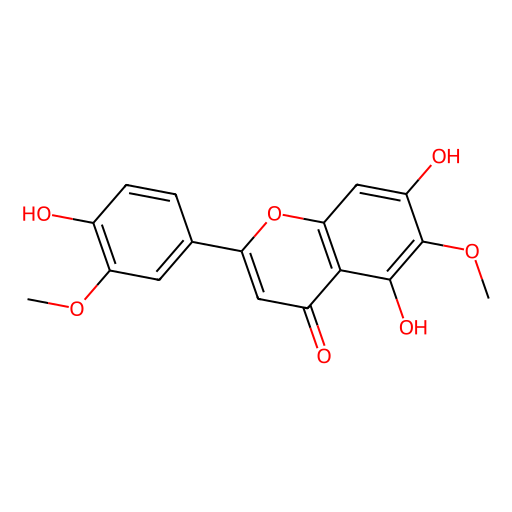

In [3]:
import torch
from rdkit import Chem
from rdkit.Chem import Draw

input_text = "The molecule is a trihydroxyflavone that is flavone with hydroxy groups at positions 5, 7 and 4' and methoxy groups at positions 3' and 6. Isolated from Salvia tomentosa and Artemisia asiatica, it exhibits anti-allergic, anti-inflammatory and apoptosis inducing activties. It has a role as a metabolite, an anti-inflammatory agent, an apoptosis inducer, an anti-allergic agent and an antineoplastic agent. It is a trihydroxyflavone and a dimethoxyflavone."
print(input_text)
input = processor(input_text)
with torch.no_grad():
    smiles = model.decode({"text": input}, num_beams=5, max_length=512)[0]
print("Generated molecule:")
Draw.MolsToGridImage(
    [Chem.MolFromSmiles(smiles)], 
    molsPerRow=1, 
    subImgSize=(512, 512)
)